 Bài Tập Xử Lý Ảnh - Biến Đổi Hình Học


In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def show_img(img, title="Image"):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

os.makedirs('output', exist_ok=True)


## 1. Chọn quả kiwi và tịnh tiến sang phải 30 pixels

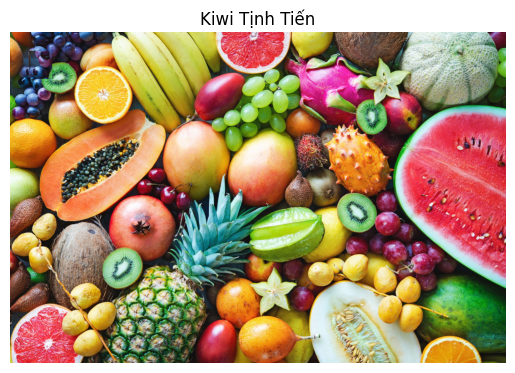

In [4]:

img = cv2.imread('exercise/colorful-ripe-tropical-fruits.jpg')
kiwi = img[80:200, 50:150].copy()  
translated = img.copy()
translated[80:200, 80:180] = kiwi  
cv2.imwrite('output/kiwi_translated.jpg', translated)
show_img(translated, "Kiwi Tịnh Tiến")


## 2. Chọn quả đu đủ và dưa hấu, đổi màu

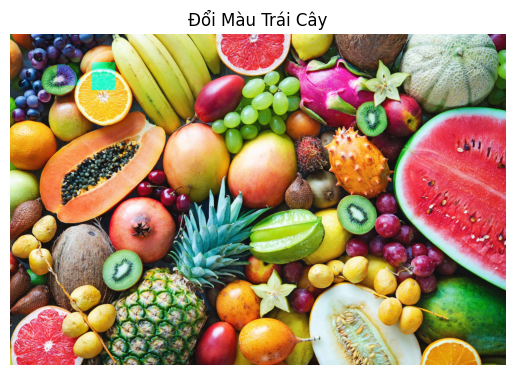

In [5]:

def change_color(img_section):
    hsv = cv2.cvtColor(img_section, cv2.COLOR_BGR2HSV)
    hsv[..., 0] = (hsv[..., 0] + 60) % 180  # Thay đổi hue
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Giả định vùng đu đủ và dưa hấu
papaya = img[100:220, 200:300]
watermelon = img[120:240, 350:450]
img[100:220, 200:300] = change_color(papaya)
img[120:240, 350:450] = change_color(watermelon)

cv2.imwrite('output/fruit_colored.jpg', img)
show_img(img, "Đổi Màu Trái Cây")


## 3. Chọn núi và thuyền, xoay mỗi đối tượng 45 độ

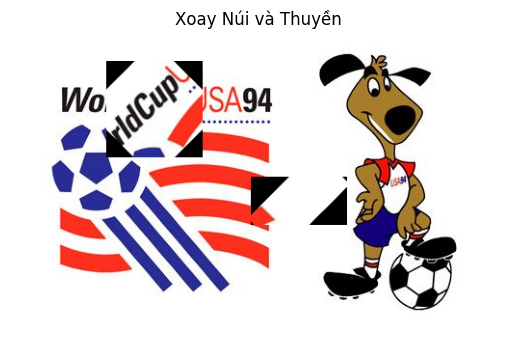

In [7]:

quangninh = cv2.imread('world_cup.jpg')

def rotate(image, angle):
    (h, w) = image.shape[:2]
    center = (w//2, h//2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, M, (w, h))

# Giả định vùng núi và thuyền
mountain = quangninh[30:130, 100:200]
boat = quangninh[150:200, 250:350]
quangninh[30:130, 100:200] = rotate(mountain, 45)
quangninh[150:200, 250:350] = rotate(boat, 45)

cv2.imwrite('output/quangninh_rotated.jpg', quangninh)
show_img(quangninh, "Xoay Núi và Thuyền")


## 4. Tăng kích thước ngôi chùa lên 5 lần

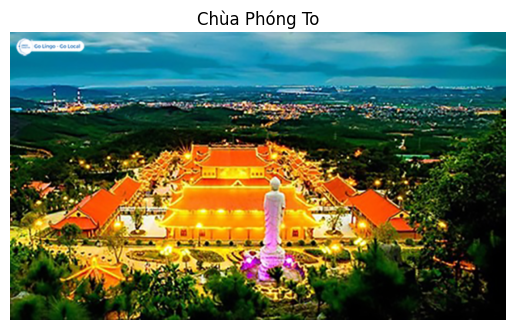

In [9]:

pagoda = cv2.imread('exercise/pagoda.jpg')  # Tạm lấy tên ảnh bất kỳ
(h, w) = pagoda.shape[:2]
scaled = cv2.resize(pagoda, (w*5, h*5), interpolation=cv2.INTER_LINEAR)
cv2.imwrite('output/pagoda_scaled.jpg', scaled)
show_img(scaled, "Chùa Phóng To")


## 5. Tạo Menu Thực Hiện Phép Biến Đổi

1. colorful-ripe-tropical-fruits.jpg
2. ha-long-bay-in-vietnam.jpg
3. pagoda.jpg
4. quang_ninh.jpg


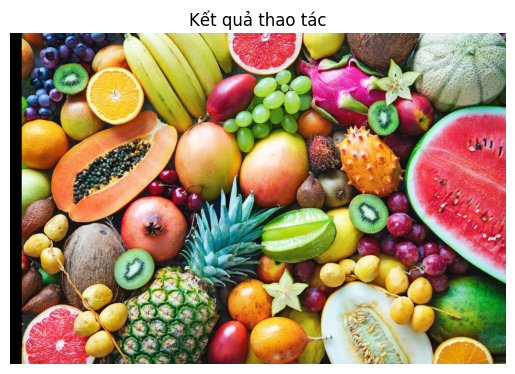

In [10]:

def menu():
    files = [f for f in os.listdir('exercise') if f.endswith('.jpg')]
    for i, f in enumerate(files): print(f"{i+1}. {f}")
    img_index = int(input("Chọn hình (1-3): ")) - 1
    action = input("Chọn thao tác (T: tịnh tiến, X: xoay, P: phóng to, H: thu nhỏ, C: chọn điểm): ").upper()

    img = cv2.imread(f"exercise/{files[img_index]}")
    result = img.copy()

    if action == 'T':
        M = np.float32([[1, 0, 50], [0, 1, 0]])
        result = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
    elif action == 'X':
        center = (img.shape[1]//2, img.shape[0]//2)
        M = cv2.getRotationMatrix2D(center, 30, 1.0)
        result = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
    elif action == 'P':
        result = cv2.resize(img, None, fx=1.5, fy=1.5)
    elif action == 'H':
        result = cv2.resize(img, None, fx=0.5, fy=0.5)
    elif action == 'C':
        def click_event(event, x, y, flags, param):
            if event == cv2.EVENT_LBUTTONDOWN:
                print(f"Coordinate: ({x}, {y})")
        cv2.imshow("Image", img)
        cv2.setMouseCallback("Image", click_event)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        return

    cv2.imwrite('output/menu_result.jpg', result)
    show_img(result, "Kết quả thao tác")

menu()
